# *Tanzanian Water Wells*

### Business understanding
  My stakeholders are members of an NGO  who want to identify the wells in need of repair or need for re-construction. By addressing this ternary classification problem, I can provide valuable insights and aid decision-making processes. 

### Problem statement
Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.

### Objectives :
. To develop a classifier that can predict the condition of water wells based on several factors

## Data understanding
____________

Importing the important libraries to be used throught  this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats
import warnings
%matplotlib inline
sns.set_style('dark')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import resample


warnings.filterwarnings('ignore')



There are three datasets , training_set_labels.csv , training_set_values.csv and Test_set_values
I will load the training_set_labels.csv and training_set_values.csv and try to understand its characteristics before i go ahead to data preparation.

#### Loading the datasets

In [2]:
df_labels = pd.read_csv('training_Set_labels.csv')
df_labels.head(10)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
5,9944,functional
6,19816,non functional
7,54551,non functional
8,53934,non functional
9,46144,functional


In [3]:
df_values = pd.read_csv('training_Set_values.csv')
df_values.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [4]:
df_values.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [5]:
df_test_set = pd.read_csv('Test_set_values.csv')
df_test_set.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


training_set_labels.csv contains two columns, id and status group . id is a unique identifier while status group tells us wether the well is functional or non-functional. 
training_set_values has 40 columns all giving the attributes of the data .
We shall merge the data.
the Test_set is similar to training_set_values. 

these are the columns and what they represent:

* amount_tsh - Total static head (amount water available to waterpoint)
* date_recorded - The date the row was entered
* funder - Who funded the well
* gps_height - Altitude of the well
* installer - Organization that installed the well
* longitude - GPS coordinate
* latitude - GPS coordinate
* wpt_name - Name of the waterpoint if there is one
* num_private - no description
* basin - Geographic water basin
* subvillage - Geographic location
* region - Geographic location
* region_code - Geographic location (coded)
* district_code - Geographic location (coded)
* lga - Geographic location
* ward - Geographic location
* population - Population around the well
* public_meeting - True/False
* recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* permit - If the waterpoint is permitted
* construction_year - Year the waterpoint was constructed
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint

## Data Preparation
------------------------

### merging data
Merging the df_values, df_labels and df_test_set to get one whole DataFrame using a function

In [6]:
#function to merge the datasets
def merge_df (df1, df2, df3,on_columns):

    merged_df = pd.merge(df1, df2, on=on_columns)
    return merged_df
data = merge_df(df_labels, df_values ,df_test_set,on_columns = ['id'])
data.head(10)


,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,functional,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,non functional,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,non functional,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,non functional,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,functional,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


Here I will explore the data to get a better understanding of its state, then decide on the steps I need to take to clean it. I will begin by defining some  functions for the following tasks:

* getting the shape of the data
* getting data info
* simple check for missing data
* duplicates
* descriptive stats

I will then group together the functions under one function

In [7]:
# Function to get the shape of data
def data_shape(data):
    """Simple function to provide the shape of the data"""
    out = print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns", '\n')

    return out

# Function to get info of the data 

def data_info(data):
    """Simple function to provide the info of the data"""
    out = print(data.info(), '\n')
    
    return out

# Function to check for missing values

def data_missing(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values", '\n')
    else:
        out = print(f"The Data has missing values.", '\n')

    return out

# Function to check for duplicates

def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

# Function to check for duplicates on the ID column

def unique_column_duplicates(data, column):
    """handling duplicates in unique column"""
    # empty list to store the duplicate bools
    duplicates = []
    for i in data[column].duplicated():
        duplicates.append(i)
    
    # identify if there are any duplicates
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        out = print(f"The column {column.title()} has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')
# Function to check for descriptive stats

def data_describe(data):
    """Simple function to check the descriptive values of the data"""
    out = print(data.describe(), '\n')
    
    return out



Lets then combine all the above functions to one overal explore function

In [8]:
# overall function for data understanding

def explore(data):
    """Group of functions to explore data """
    out1 = data_shape(data)
    out2 = data_info(data)
    out3 = data_missing(data)
    out4 = identify_duplicates(data)
    out5 = unique_column_duplicates(data, 'id')
    out6 = data_describe(data)
    
    return out1, out2, out3, out4, out5

In [9]:
# Lets explore!!!!
explore(data)

The DataFrame has:
	* 59400 rows
	* 41 columns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  regio

(None, None, None, None, None)

This data has missing values, No duplicates, and the column id has no duplicates

### Data cleaning

Lets now check for the missing values in each column using the function below

In [10]:
#function to check for missing values in each column and giving the sum of missing values in the columns

def missing_values(data):
    # To calculate the sum of missing values in each column
    missing_values_count = data.isnull().sum()

    missing_values_list = []
    for column, count in missing_values_count.items():
        missing_values_list.append((column, count))
        
    missing_values_list = sorted(missing_values_list, key=lambda x: x[1], reverse=True)

    return missing_values_list

missing_values = missing_values(data)

# Print the list of columns and their missing values
for column, count in missing_values:
    print(f"{column}: {count} missing values")


scheme_name: 28166 missing values
scheme_management: 3877 missing values
installer: 3655 missing values
funder: 3635 missing values
public_meeting: 3334 missing values
permit: 3056 missing values
subvillage: 371 missing values
id: 0 missing values
status_group: 0 missing values
amount_tsh: 0 missing values
date_recorded: 0 missing values
gps_height: 0 missing values
longitude: 0 missing values
latitude: 0 missing values
wpt_name: 0 missing values
num_private: 0 missing values
basin: 0 missing values
region: 0 missing values
region_code: 0 missing values
district_code: 0 missing values
lga: 0 missing values
ward: 0 missing values
population: 0 missing values
recorded_by: 0 missing values
construction_year: 0 missing values
extraction_type: 0 missing values
extraction_type_group: 0 missing values
extraction_type_class: 0 missing values
management: 0 missing values
management_group: 0 missing values
payment: 0 missing values
payment_type: 0 missing values
water_quality: 0 missing values
q

Since the colums are very many, and some seem to be giving the same information as another, I will first drop the columns to make the data more manageable.
* extraction_type,extraction_type_class	and	extraction_type_group give same info hence I'll drop extraction_type and extraction_type_class.
* management is the same as scheme_management so I drop scheme_management
* payment and payment_type are the exact same, so I drop payment type
* water_quality and quality_group are the same , I drop quality group
* Quantity and quantity_group are exact same so I drop quantyty_group
* source type and source are similar , I drop source
* waterpoint_type and waterpoint_type_group  are the same I drop water_point_type_group

* I'll also drop wpt_name,funder,permit,recorded_by i considered them not imporant and had missing values
scheme_name had alot of missing values


Below,i will drop some columns a and then for the ones with missing values that I wont drop, I will set their labels to other. These are installer,permit and funder

In [11]:
# dropping the columns
cols_to_drop = ['date_recorded', 'num_private', 'wpt_name', 'construction_year',
                     'subvillage', 'region_code', 'district_code', 'lga',
                     'ward', 'public_meeting', 'recorded_by', 'scheme_management',
                     'scheme_name', 'extraction_type', 'extraction_type_group', 
                      'water_quality', 'source','source_type', 'waterpoint_type_group',
                     'payment_type', 'management', 'id', 'quantity_group']
data = data.drop(columns=cols_to_drop)
data.columns

Index(['status_group', 'amount_tsh', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'basin', 'region', 'population', 'permit',
       'extraction_type_class', 'management_group', 'payment', 'quality_group',
       'quantity', 'source_class', 'waterpoint_type'],
      dtype='object')

Below is a Function to set missing values as other in specific columns

In [12]:

def set_missing_values_to_other(data, columns):

    for column in columns:
        # Set missing values to "Other"
        data[column].fillna("Other", inplace=True)


# Specify the columns to set missing values to "Other"
columns_to_fill = [ 'installer','permit','funder' ]

# Call the function to set missing values to "Other"
set_missing_values_to_other(data, columns_to_fill)

#### Outliers
we'll check for outliers using the boxplot

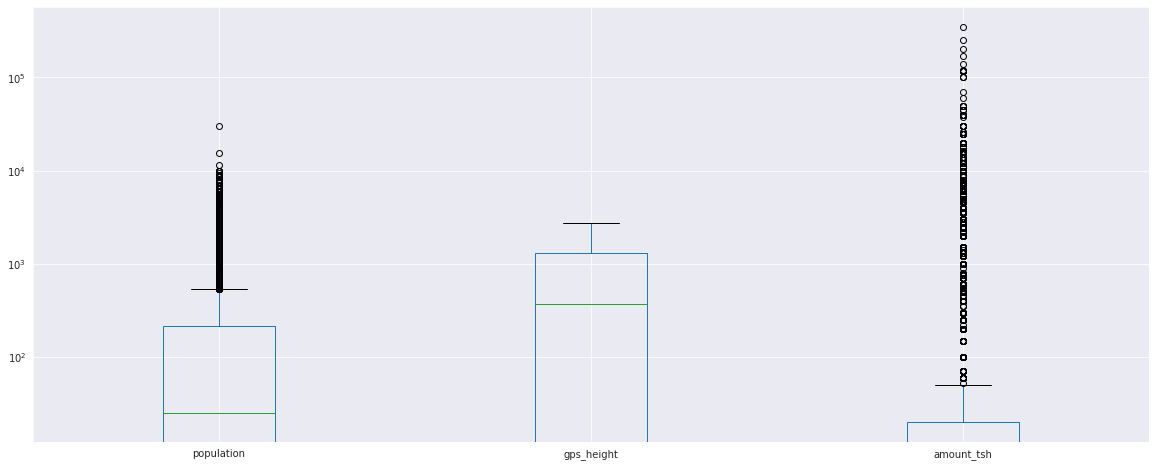

In [13]:
#Plotting a boxplot to check for outliers
columns = ['population','gps_height','amount_tsh']
data[columns].boxplot(figsize = (20,8))
plt.yscale('log')
plt.show()

Population and Amount_tsh have outliers.Lets see their Normal curves below

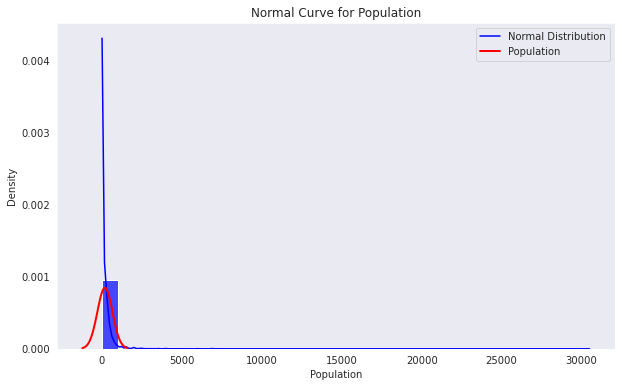

In [14]:

population_data = data['population']

# Calculate mean and standard deviation of the population data
mean = population_data.mean()
std = population_data.std()

# Generate data points for the normal curve
x = np.linspace(mean - 3*std, mean + 3*std, 100)
y = scipy.stats.norm.pdf(x, mean, std)

# Plot the normal curve
plt.figure(figsize=(10, 6))
sns.histplot(population_data, kde=True, color='blue', alpha=0.7, bins=30, stat='density')
plt.plot(x, y, color='red', linewidth=2)
plt.xlabel('Population')
plt.ylabel('Density')
plt.title('Normal Curve for Population')
plt.legend(['Normal Distribution', 'Population'])
plt.show()


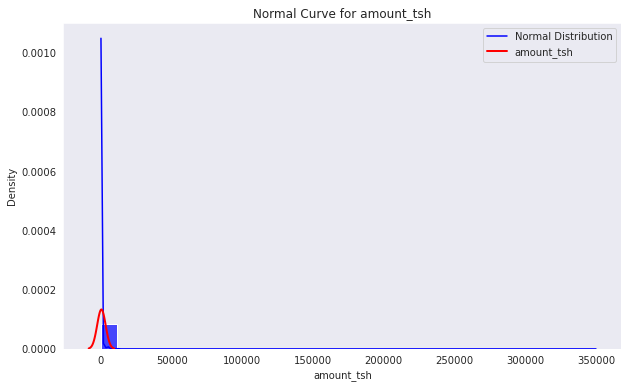

In [15]:
amount_tsh= data['amount_tsh']

# Calculate mean and standard deviation of the population data
mean = amount_tsh.mean()
std = amount_tsh.std()

# Generate data points for the normal curve
x = np.linspace(mean - 3*std, mean + 3*std, 100)
y = scipy.stats.norm.pdf(x, mean, std)

# Plot the normal curve
plt.figure(figsize=(10, 6))
sns.histplot(amount_tsh, kde=True, color='blue', alpha=0.7, bins=30, stat='density')
plt.plot(x, y, color='red', linewidth=2)
plt.xlabel('amount_tsh')
plt.ylabel('Density')
plt.title('Normal Curve for amount_tsh')
plt.legend(['Normal Distribution', 'amount_tsh'])
plt.show()

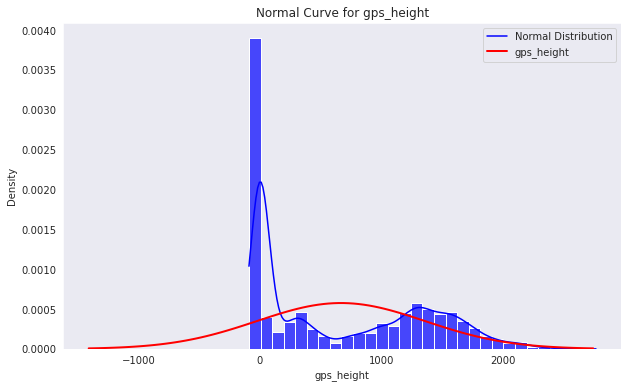

In [16]:
gps_height= data['gps_height']

# Calculate mean and standard deviation of the population data
mean = gps_height.mean()
std = gps_height.std()

# Generate data points for the normal curve
x = np.linspace(mean - 3*std, mean + 3*std, 100)
y = scipy.stats.norm.pdf(x, mean, std)

# Plot the normal curve
plt.figure(figsize=(10, 6))
sns.histplot(gps_height, kde=True, color='blue', alpha=0.7, bins=30, stat='density')
plt.plot(x, y, color='red', linewidth=2)
plt.xlabel('gps_height')
plt.ylabel('Density')
plt.title('Normal Curve for gps_height')
plt.legend(['Normal Distribution', 'gps_height'])
plt.show()

Removing the Outliers

In [17]:
# Define the columns to check for outliers
columns = ['population','gps_height','amount_tsh']

print("Summary statistics before removing outliers:")
print(data[columns].describe())

# Calculate the IQR for each column
Q1 = data[columns].quantile(0.25)
Q3 = data[columns].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers from each column
data = data[~((data[columns] < (Q1 - 1.5 * IQR)) | (data[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nSummary statistics after removing outliers:")
print(data[columns].describe())

Summary statistics before removing outliers:
         population    gps_height     amount_tsh
count  59400.000000  59400.000000   59400.000000
mean     179.909983    668.297239     317.650385
std      471.482176    693.116350    2997.574558
min        0.000000    -90.000000       0.000000
25%        0.000000      0.000000       0.000000
50%       25.000000    369.000000       0.000000
75%      215.000000   1319.250000      20.000000
max    30500.000000   2770.000000  350000.000000

Summary statistics after removing outliers:
         population    gps_height    amount_tsh
count  45114.000000  45114.000000  45114.000000
mean      84.982311    541.501020      3.872963
std      133.330504    668.301455     11.738785
min        0.000000    -63.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        1.000000     59.000000      0.000000
75%      150.000000   1220.000000      0.000000
max      537.000000   2770.000000     50.000000


# Exploratory Data Analysis
--------------------

## Univariate Analysis

Below is a function that plots bar graphs for categorical columns . It will help in the Univariate Analysis

In [18]:
def plot_bar(data, column):
    
    value_counts = data[column].value_counts()
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Bar Graph of {column}")
    plt.xticks(rotation=90)
    plt.show()


##### extraction_type_class

In [19]:
data['extraction_type_class'].value_counts()

gravity         18794
handpump        12760
other            5549
submersible      4898
motorpump        2714
rope pump         306
wind-powered       93
Name: extraction_type_class, dtype: int64

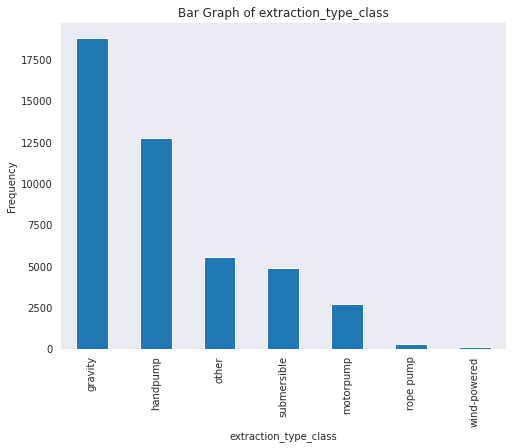

In [20]:
plot_bar(data, "extraction_type_class")


Gravity,nira/tanira are the most used extraction type

##### status_group

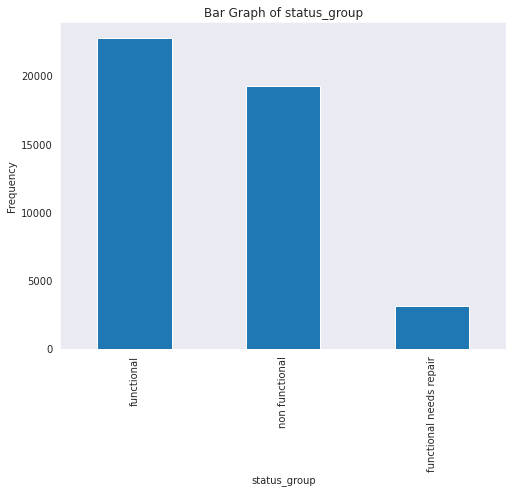

In [21]:
plot_bar(data,"status_group")

There are more functional wells than non functional. Though non-functional is a big number.The wells that need repair are much less

##### quality_group

In [22]:
data['quality_group'].value_counts()

good        37945
salty        4106
unknown      1712
milky         758
colored       407
fluoride      186
Name: quality_group, dtype: int64

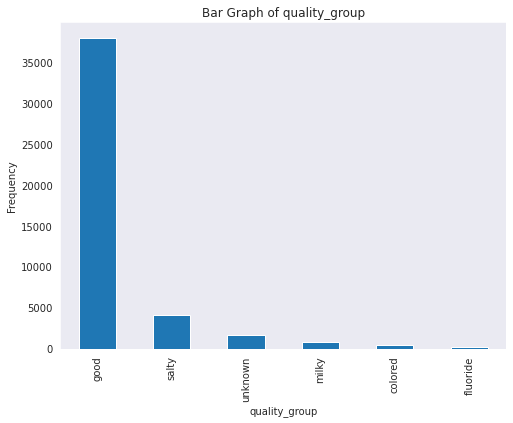

In [23]:

plot_bar(data, "quality_group")

Most wells have good water  compared to the other types

##### waterpoint_type

In [24]:
data['waterpoint_type'].value_counts()

communal standpipe             20632
hand pump                      13495
other                           5632
communal standpipe multiple     4593
improved spring                  684
cattle trough                     74
dam                                4
Name: waterpoint_type, dtype: int64

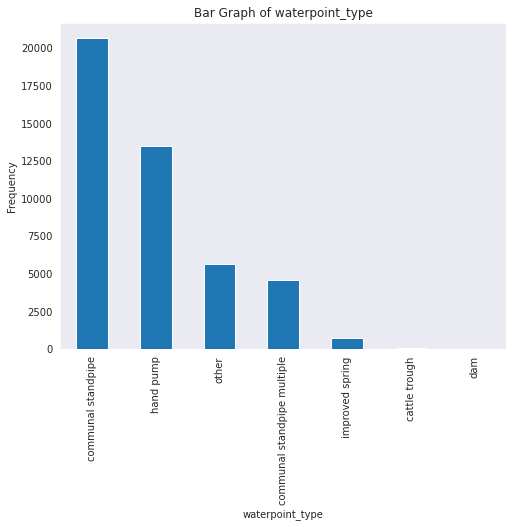

In [25]:
plot_bar(data,"waterpoint_type")

communal standpipe and hand pump are the most types of waterpoints

##### permit

In [26]:
data['permit'].value_counts()

True     28910
False    13550
Other     2654
Name: permit, dtype: int64

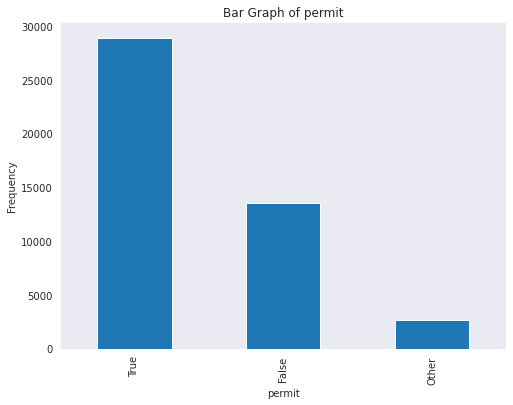

In [27]:


def plot_bar(data, column):
    
    value_counts = data[column].value_counts()
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Bar Graph of {column}")
    plt.xticks(rotation=90)
    plt.show()

plot_bar(data,"permit")

##### source_class

In [28]:
data['source_class'].value_counts()

groundwater    35759
surface         9101
unknown          254
Name: source_class, dtype: int64

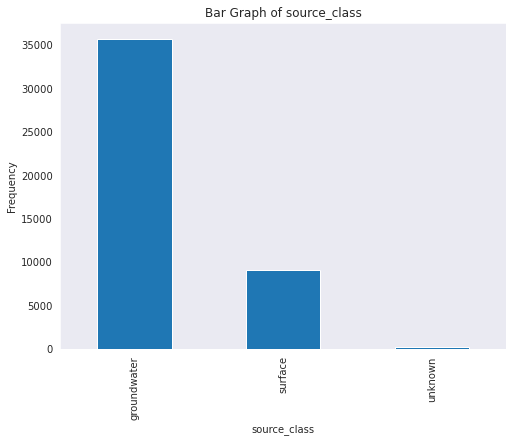

In [29]:
plot_bar(data,"source_class")

Most water sources are shallow wells

Histograms for the numerical variables

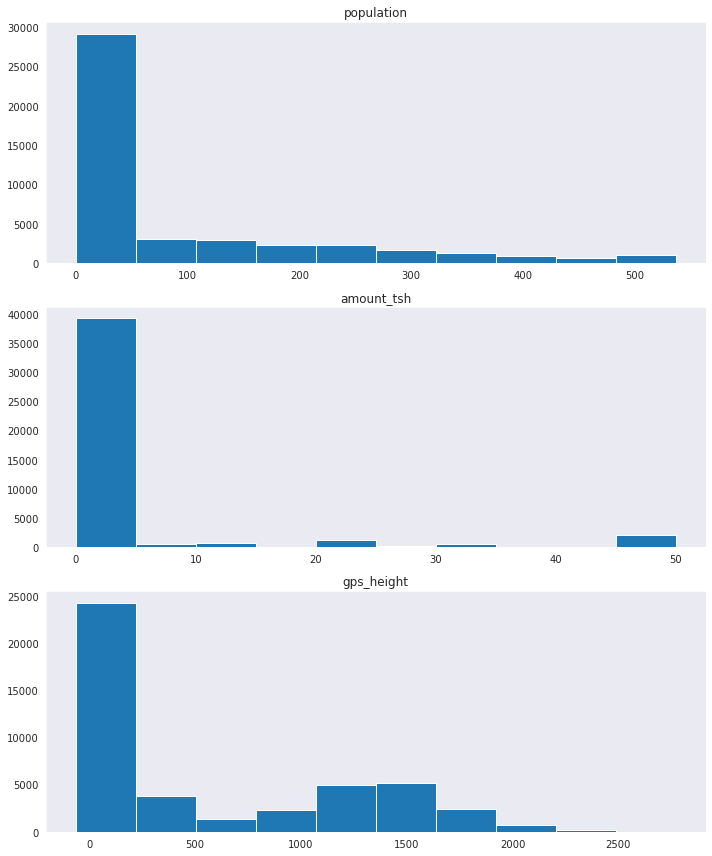

In [30]:
def plot_histograms(data, columns, bins=10):
    
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, len(columns) * 4))
    
    for i, column in enumerate(columns):
        ax = axes[i]
        ax.hist(data[column], bins=bins)
        ax.set_title(column)
    
    plt.tight_layout()
    plt.show()

columns_to_plot = ["population", "amount_tsh", "gps_height"]
plot_histograms(data, columns_to_plot)




## Bivariate Analysis

Relationship between gps_height and status group

Text(0.5, 0.98, 'Height vs status group')

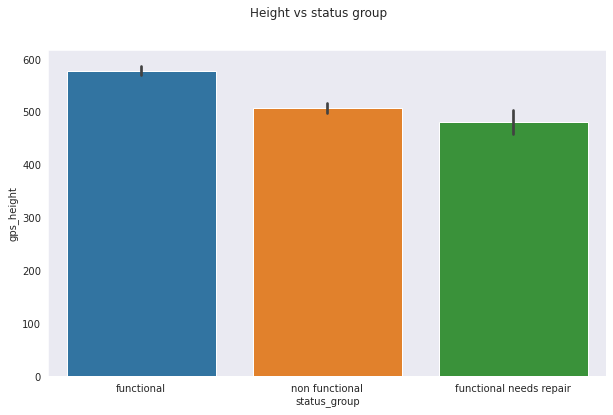

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x='status_group', y ='gps_height',
                data=data)
plt.suptitle("Height vs status group")

Functional waterpoints are mostly located at high altitudes

Population around the wells and status group

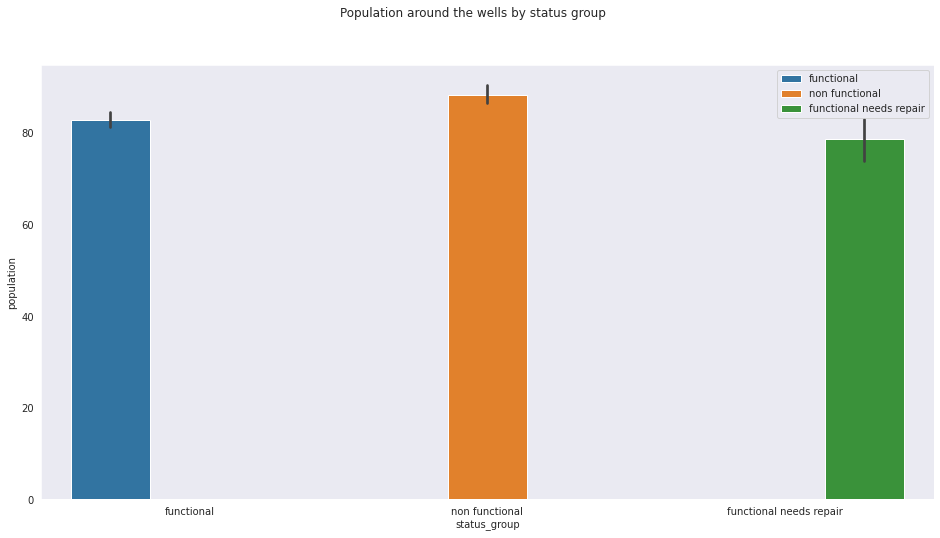

In [32]:
plt.subplots(figsize = (16,8))
sns.barplot(data = data,x = 'status_group', y = 'population', hue = "status_group")
plt.suptitle("Population around the wells by status group")
plt.legend(loc='upper right')
plt.show();

Non-functional wells have hihger population around it. The difference isnt soo much though

the relationship between water quality and status group

In [33]:
data.columns

Index(['status_group', 'amount_tsh', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'basin', 'region', 'population', 'permit',
       'extraction_type_class', 'management_group', 'payment', 'quality_group',
       'quantity', 'source_class', 'waterpoint_type'],
      dtype='object')

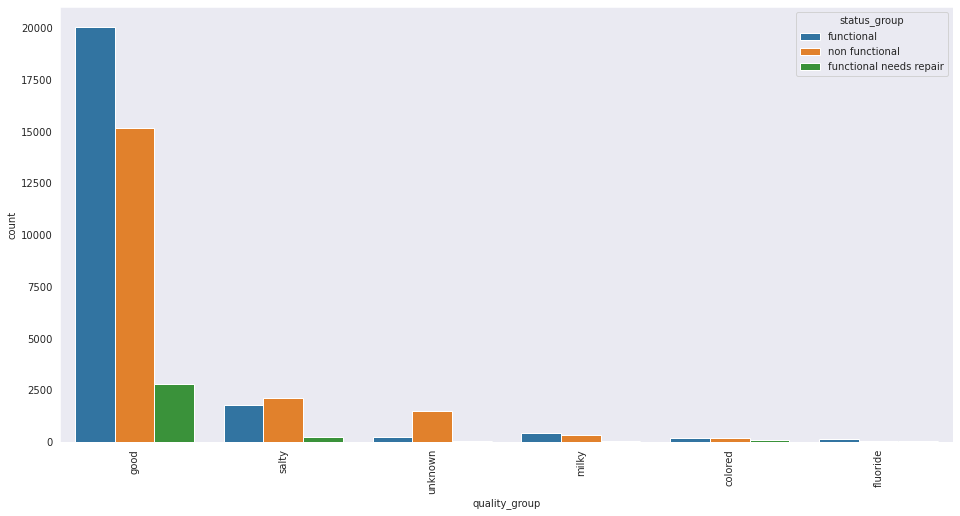

In [34]:

plt.figure(figsize=(16,8))
sns.countplot(x= 'quality_group', 
              hue= 'status_group', 
              data= data, 
              order=data.quality_group.value_counts()
               .index).set_xticklabels(data.quality_group.value_counts()
               .index, rotation=90);


soft water has more functional wells .

## Multivariate Analysis

Lets calculate the correlation matrix

In [35]:

correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)


            amount_tsh  gps_height  longitude  latitude  population
amount_tsh    1.000000    0.014026   0.178742 -0.124773    0.168416
gps_height    0.014026    1.000000   0.196183  0.034586    0.372028
longitude     0.178742    0.196183   1.000000 -0.450580    0.204814
latitude     -0.124773    0.034586  -0.450580  1.000000   -0.078011
population    0.168416    0.372028   0.204814 -0.078011    1.000000


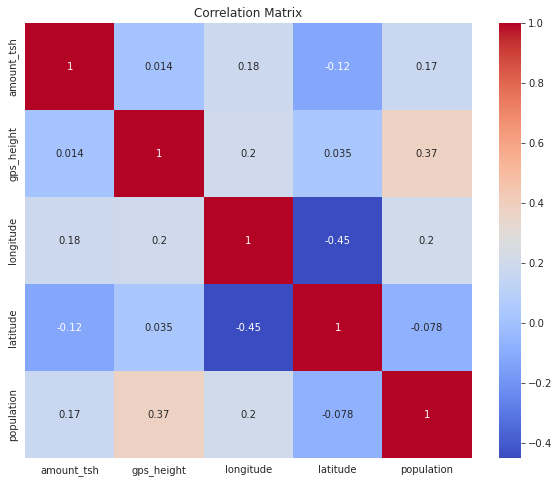

In [36]:
#Plotting a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Note that this only shows for the numerical columns .

## Data Preproccessing
--------------------
I am going to prepare my data for modeling .I will encode the categorical attributes and define my X and y for both my training data and test data


dropping the columns that i'll not use for modeling

In [37]:

data.drop(['funder','installer','longitude','latitude'],
            axis = 1,inplace = True)
data.columns

Index(['status_group', 'amount_tsh', 'gps_height', 'basin', 'region',
       'population', 'permit', 'extraction_type_class', 'management_group',
       'payment', 'quality_group', 'quantity', 'source_class',
       'waterpoint_type'],
      dtype='object')

Next, i split the data into a training and test set. So that the model can learn from the training and we can later test it using the test set

In [38]:
# Determining the predictor variables
X = data.drop(["status_group"],axis = 1)

# Determining the target variables

y = data.status_group

# Splitting the data to training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,random_state =42)

Lets check the shape of the data that we split

In [39]:
print(f'X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns')
print(f'X_test has {X_test.shape[0]} rows and {X_test.shape[1]} columns')
print(f'y_train has {y_train.shape[0]} rows')
print(f'y_test has {y_test.shape[0]} rows')

X_train has 31579 rows and 13 columns
X_test has 13535 rows and 13 columns
y_train has 31579 rows
y_test has 13535 rows


Converting categorical variables to dummy variables...this will be easier to manipulate for X_train and X_test

In [40]:
# Converting categorical variable into dummy variables f
X_train_cat = pd.get_dummies(X_train.select_dtypes(include = ["object"]))

X_test_cat = pd.get_dummies( X_test.select_dtypes(include = ["object"]))

# Concatenating Numerical values with dummy variables 
X_train_2 = pd.concat([X_train.select_dtypes(exclude = ["object"]),X_train_cat,],axis = 1)

X_test_2 = pd.concat([X_test.select_dtypes(exclude = ["object"]),X_test_cat],axis = 1)

### Scaling
#### using the standard scaller

In [41]:
scaler = StandardScaler()

# Fit and transform X_train

X_train_scaled = scaler.fit_transform(X_train_2)

# Transform X_test

X_test_scaled = scaler.transform(X_test_2)

Id like to LabelEncode my y variables since its also a categorical feature

In [42]:
label_encoding = LabelEncoder()

# fit_transforming the y_train and y_test

y_train_2 = label_encoding.fit_transform(y_train)

#
y_test_2 = label_encoding.transform(y_test)

In [43]:
# Checking the labelencoded values for y_train and y_test
y_train_s = pd.Series(y_train_2)

print(y_train.value_counts())

y_test_s = pd.Series(y_test_2)

print(y_train_s.value_counts())

functional                 15897
non functional             13483
functional needs repair     2199
Name: status_group, dtype: int64
0    15897
2    13483
1     2199
dtype: int64


`0` represents `functional wells`
    
`2` represents `non functional wells`
    
`1` represents  ` functional needs repair`

To sort the issue of an imbalanced dataset lets use SMOTE to balance class distribution on our training dataset

In [44]:
smote = SMOTE()
# Fitting smote
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_2)

# Modeling
--------

Here, I will use Some different models then later choose the best predictive Models. For my first model, I will use Logistics Regression . 

I will also use GridsearchCV so as to select the best features for the model


I already imported The required libraries and files at the start of this Notebook

## 1. Logistic Regression

In [45]:
#instantiate LogisticRegression 
logreg = LogisticRegression(random_state = 42,
                            multi_class ="multinomial",
                            class_weight = "balanced")

# Fitting logistic regression
logreg.fit(X_train_resampled, y_train_resampled)

# Predicting on training and test sets
log_training_preds = logreg.predict(X_train_resampled)
log_test_preds = logreg.predict(X_test_scaled)

# Accuracy of training and test sets
log_training_accuracy = accuracy_score(y_train_resampled, log_training_preds)
log_test_accuracy = accuracy_score(y_test_2, log_test_preds)

print('Training Accuracy: {:.4}%'.format(log_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(log_test_accuracy * 100))

Training Accuracy: 62.0%
Validation accuracy: 59.48%


The accuracy resuts are not as we wished them to be

Lets use Hyperparameter to see if the accuracy will improve

In [46]:
# Creating a parameter grid for logistiv regression
param_grid = [{'penalty' : ['l1', 'l2'],
               'C' : np.logspace(-1, 1, 5),
               'solver' : ['lbfgs','newton-cg']}]

# Create a GridSearchCv
logreg_clf = GridSearchCV(estimator = logreg,
                          param_grid = param_grid,
                          cv = 3, verbose=True, n_jobs=-1)

# Fitting using grid search
best_clf = logreg_clf.fit(X_train_resampled,y_train_resampled)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [47]:
# Getting the best hyperparameters for our logistic regression 
best_clf.best_params_

{'C': 0.31622776601683794, 'penalty': 'l2', 'solver': 'newton-cg'}

### Fixing the logisticRegression model

In [48]:
# Instantiating logistic regression model using the best parameters from the grid search
best_logreg = LogisticRegression(random_state = 42,multi_class ="multinomial",
                                 class_weight = "balanced",
                                 C = 0.31622776601683794,penalty = "l2",
                                solver = "lbfgs")

In [49]:
# Fitting the model
best_logreg.fit(X_train_resampled,y_train_resampled)

LogisticRegression(C=0.31622776601683794, class_weight='balanced',
                   multi_class='multinomial', random_state=42)

### LogisticsRegression model Evaluation


In [50]:
# Function that makes y predicted values
def make_preds(model, split):
    """ A function that makes predictions"""
    prediction = model.predict(split)
    return prediction

In [51]:
# Predict on training and test sets
best_logreg_training_preds = best_logreg.predict(X_train_resampled)
best_logreg_preds = best_logreg.predict(X_test_scaled)


# Accuracy of training and test sets
best_logreg_training_accuracy = accuracy_score(y_train_resampled, best_logreg_training_preds)
best_logreg_test_accuracy = accuracy_score(y_test_2, best_logreg_preds)

print('Training Accuracy: {:.4}%'.format(best_logreg_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(best_logreg_test_accuracy * 100))

Training Accuracy: 61.99%
Validation accuracy: 59.49%


This certainly didnt make a significant difference

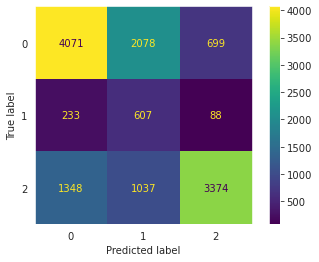

In [52]:
# Confusion matrix for testing data
plot_confusion_matrix(best_logreg, X_test_scaled, y_test_2)
plt.show()

# kneighborsClassifier

The important libraries had been imported before

In [53]:
#instantiate baseline model
knn_clf = KNeighborsClassifier()

#fit KNearest Neighbors
knn_clf.fit(X_train_resampled, y_train_resampled)

#predict on the test set
y_hat_train = knn_clf.predict(X_train_resampled)
y_hat_test = knn_clf.predict(X_test_scaled)

# accuracy 
knn_train_accuracy = accuracy_score(y_train_resampled, y_hat_train) * 100
knn_test_accuracy = accuracy_score(y_test_2, y_hat_test) * 100

print('Train accuracy: {0}'.format(knn_train_accuracy))
print('Test accuracy: {0}'.format(knn_test_accuracy))

Train accuracy: 81.15996728942568
Test accuracy: 69.0062800147765


In [54]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Instantiate the K-nearest neighbors classifier
knn_clf = KNeighborsClassifier()

# Perform randomized search with cross-validation
randomized_search = RandomizedSearchCV(estimator=knn_clf, param_distributions=param_grid, scoring='accuracy', cv=5, n_iter=10)

# Fit the randomized search to a subset of the data
X_train_subset = X_train_resampled[:1000]  # Example: using the first 1000 samples
y_train_subset = y_train_resampled[:1000]
randomized_search.fit(X_train_subset, y_train_subset)

# Get the best hyperparameters and best score
best_params = randomized_search.best_params_
best_score = randomized_search.best_score_

# Print the best hyperparameters and best score
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 10, 'metric': 'manhattan'}
Best Score: 0.6370000000000001


### Evaluation

In [55]:


# Instantiate the K-nearest neighbors classifier with the best hyperparameters
knn_clf = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='manhattan')

# Fit the classifier on the training data
knn_clf.fit(X_train_subset, y_train_subset)

# Predict on the training and test sets
y_hat_train = knn_clf.predict(X_train_resampled)
y_hat_test = knn_clf.predict(X_test_scaled)

# Calculate train accuracy
train_accuracy = accuracy_score(y_train_resampled, y_hat_train)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test_2, y_hat_test)

print("Train Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)
# Calculate confusion matrix
confusion_matrix_train = confusion_matrix(y_train_resampled, y_hat_train)
confusion_matrix_test = confusion_matrix(y_test_2, y_hat_test)



Train Accuracy: 50.11427732695897
Test Accuracy: 65.96231991134097


This Model has performed better before it was evaluated

## RandomForestClassifier

baseline model

In [56]:
# instantiating RandomForestClassifier
RF = RandomForestClassifier()
# Fitting RandomForestClassifier
RF.fit(X_train_resampled, y_train_resampled)

# Predict on training and test sets
RF_training_preds = RF.predict(X_train_resampled)
RF_test_preds = RF.predict(X_test_scaled)

# Accuracy of training and test sets
RF_training_accuracy = accuracy_score(y_train_resampled, RF_training_preds)
RF_test_accuracy = accuracy_score(y_test_2, RF_test_preds)

print('Training Accuracy: {:.4}%'.format(RF_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(RF_test_accuracy * 100))

Training Accuracy: 89.77%
Validation accuracy: 72.12%


Lets try to reduce the overfit

In [57]:


# Create a smaller subset of the training data
X_train_subset, y_train_subset = resample(X_train_resampled, y_train_resampled, n_samples=1000, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']}


# Instantiate the Random Forest Classifier
rf_clf = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid, cv=5, n_iter=10)

# Fit the random search on the subset of training data
random_search.fit(X_train_subset, y_train_subset)

# Get the best hyperparameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


Best Hyperparameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'gini'}
Best Score: 0.6120000000000001


### Iterated RandomForestClassifier

In [58]:
# Instantiating RandomForestClassifier model using the best parameters from the grid search
best_forest = RandomForestClassifier(criterion = 'entropy',max_depth = 6, max_features= 'auto',
                                     n_estimators = 100)

Fitting The model

In [59]:
# Fitting the model
best_forest.fit(X_train_scaled,y_train_2)

RandomForestClassifier(criterion='entropy', max_depth=6)

### RandomForestclassifier Evaluation

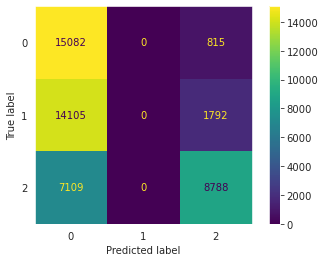

In [60]:
# Confusion matrix for trainig data
plot_confusion_matrix(best_forest, X_train_resampled, y_train_resampled)
plt.show()

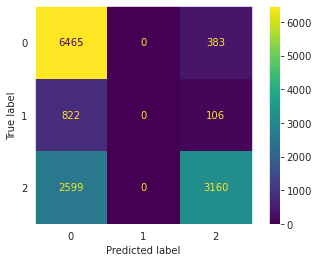

In [61]:
# Confusion matrix for testing data
plot_confusion_matrix(best_forest, X_test_scaled, y_test_2)
plt.show()

In [62]:
# Predict on training and test sets
best_forest_training_preds = best_forest.predict(X_train_resampled)
best_forest_preds = best_forest.predict(X_test_scaled)


# Accuracy of training and test sets
best_forest_training_accuracy = accuracy_score(y_train_resampled, best_forest_training_preds)
best_forest_test_accuracy = accuracy_score(y_test_2, best_forest_preds)

print('Training Accuracy: {:.4}%'.format(best_forest_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(best_forest_test_accuracy * 100))

Training Accuracy: 50.05%
Validation accuracy: 71.11%


### Validation of RandomForestRegressor

In [63]:

#train cross validation
best_forest_train_cv_score = cross_val_score(best_forest, X_train_resampled,
                                        y_train_resampled, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', best_forest_train_cv_score)

#test cross validation
best_forest_test_cv_score = cross_val_score(best_forest, X_test_scaled, y_test_2,
                                       cv = 5, n_jobs = -1).mean()
print('Test cross validation:', best_forest_test_cv_score)

Train cross validation: 0.649493963607392
Test cross validation: 0.7104543775397119


# GradientBoostingClassifier

#### Baseline model

In [64]:
#instantiate baseline model
gradient_boost_clf = GradientBoostingClassifier(random_state = 21)

# fitting GradientBoostingClassifier model
gradient_boost_clf.fit(X_train_resampled, y_train_resampled)

# predicting the y values
y_hat_train = gradient_boost_clf.predict(X_train_resampled)
y_hat_test = gradient_boost_clf.predict(X_test_scaled)

# accuracy
gradient_boost_train_accuracy_baseline = accuracy_score(y_train_resampled, y_hat_train) * 100
gradient_boost_test_accuracy_baseline = accuracy_score(y_test_2, y_hat_test) * 100


print('Train accuracy: {0}'.format(gradient_boost_train_accuracy_baseline))
print('Test accuracy: {0}'.format(gradient_boost_test_accuracy_baseline))

Train accuracy: 70.17676291124111
Test accuracy: 65.17916512744736


In [65]:
# set param grid
gradient_boost_param_grid = {'learning_rate': [0.025, 0.05],
                            'subsample': [0.5, 1.0]}

#gridsearch
gradient_boost_gridsearch = GridSearchCV(estimator = gradient_boost_clf,
                                        param_grid = gradient_boost_param_grid, 
                                        scoring = 'accuracy',
                                        n_jobs = -1,
                                        cv = 5)

# fitting the model
gradient_boost_gridsearch.fit(X_train_resampled, y_train_resampled)

# best param
gradient_boost_gridsearch.best_params_

{'learning_rate': 0.05, 'subsample': 0.5}

### Iterated model

In [66]:
gradient_boost_clf = GradientBoostingClassifier(random_state = 21,
                                                max_depth = 40,
                                                max_features = 'auto',
                                                min_samples_leaf = 3,
                                                min_samples_split = 8,
                                                n_estimators = 100,
                                                learning_rate = 0.05,
                                                subsample = 0.5)
# fitting the model
gradient_boost_clf.fit(X_train_resampled, y_train_resampled)

#predict
y_hat_train = gradient_boost_clf.predict(X_train_resampled)
y_hat_test = gradient_boost_clf.predict(X_test_scaled)

# accuracy
gradient_boost_train_accuracy = accuracy_score(y_train_resampled, y_hat_train) * 100
gradient_boost_test_accuracy = accuracy_score(y_test_2, y_hat_test) * 100

print('Train accuracy: {0}'.format(gradient_boost_train_accuracy))
print('Test accuracy: {0}'.format(gradient_boost_test_accuracy))

Train accuracy: 89.60181166257784
Test accuracy: 72.67824159586257


#### confusion Matrix

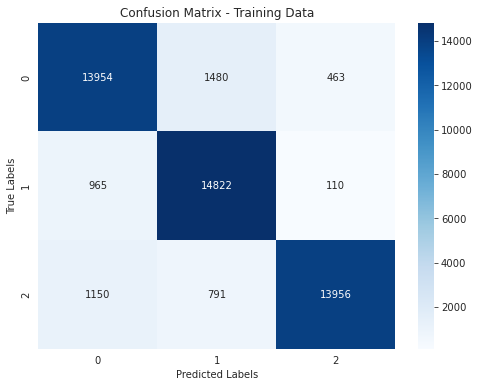

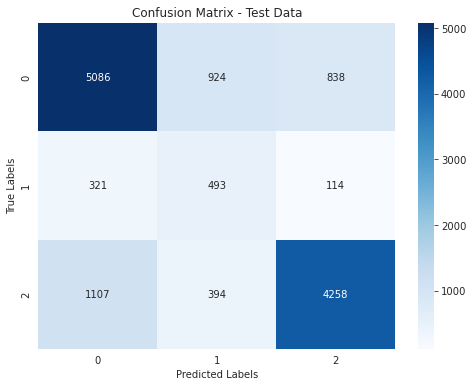

In [68]:
# Calculate confusion matrix
confusion_matrix_train = confusion_matrix(y_train_resampled, y_hat_train)
confusion_matrix_test = confusion_matrix(y_test_2, y_hat_test)

 

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Let us compare the models Accuracy results

In [69]:
print('LOGISTIC REGRESSION')
print('First Model')
print('Training Accuracy: {:.4}%'.format(log_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(log_test_accuracy * 100))
print('Iterated Model')
print('Training Accuracy: {:.4}%'.format(best_logreg_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(best_logreg_test_accuracy * 100))

print('KNEAREST NEIGHBORS')
print('First Model')
print('Train accuracy: {0}'.format(knn_train_accuracy))
print('Test accuracy: {0}'.format(knn_test_accuracy))
print('Iterated Model')
print("Train Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)

print('RANDOM FOREST CLASSIFIER')
print('First Model')
print('Training Accuracy: {:.4}%'.format(RF_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(RF_test_accuracy * 100))
print('Iterated Model')
print('Training Accuracy: {:.4}%'.format(best_forest_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(best_forest_test_accuracy * 100))

print('GRADIENT BOOSTING CLASSIFIER')
print('First Model')
print('Train accuracy: {0}'.format(gradient_boost_train_accuracy_baseline))
print('Test accuracy: {0}'.format(gradient_boost_test_accuracy_baseline))
print('Iterated Model')
print('Train accuracy: {0}'.format(gradient_boost_train_accuracy))
print('Test accuracy: {0}'.format(gradient_boost_test_accuracy))



LOGISTIC REGRESSION
First Model
Training Accuracy: 62.0%
Validation accuracy: 59.48%
Iterated Model
Training Accuracy: 61.99%
Validation accuracy: 59.49%
KNEAREST NEIGHBORS
First Model
Train accuracy: 81.15996728942568
Test accuracy: 69.0062800147765
Iterated Model
Train Accuracy: 50.11427732695897
Test Accuracy: 65.96231991134097
RANDOM FOREST CLASSIFIER
First Model
Training Accuracy: 89.77%
Validation accuracy: 72.12%
Iterated Model
Training Accuracy: 50.05%
Validation accuracy: 71.11%
GRADIENT BOOSTING CLASSIFIER
First Model
Train accuracy: 70.17676291124111
Test accuracy: 65.17916512744736
Iterated Model
Train accuracy: 89.60181166257784
Test accuracy: 72.67824159586257


GradientBoostingClassifier (iterated model)was my bet model. It has the highest test accuracy of 72.6%, indicating better performance on unseen data compared to the other models.The RandomForestClassifier first model is also a good one .This means that the Models are able to better predict the functionality of Tanzanian Water Wells better than the other models. Hence for my stakeholders i would advice the use of the model

# THANK YOU